# 준비준비

In [ ]:
## 1번 실행 -> 런타임 다시 시작 -> 2번 실행 -> 3번 실행

## 1번

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (33.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [ ]:
## 2번

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

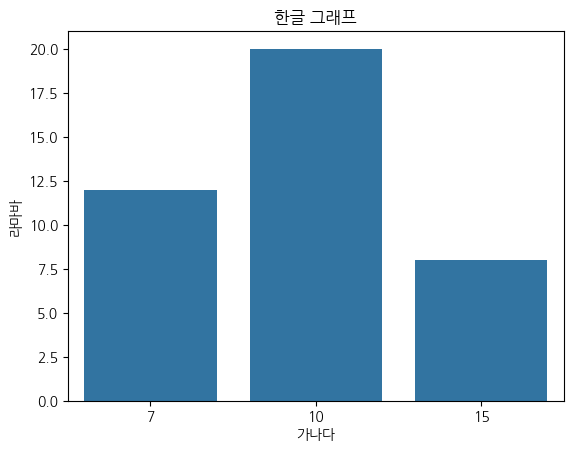

In [ ]:
## 3번

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 경로 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

# 그래프 그리기 예시
data = {'가나다': [10, 15, 7], '라마바': [20, 8, 12]}
df = pd.DataFrame(data)
sns.barplot(data=df, x='가나다', y='라마바')
plt.title('한글 그래프')
plt.show()


# 시작

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 로드 + 확인 + 시각화

In [ ]:
# 데이터 로드
import numpy as np
data_path = '/content/drive/MyDrive/반도체 캐글_mix/Wafer_Map_Datasets.npz'
dataset = np.load(data_path)

arr_0의 0번째 샘플 벡터값:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


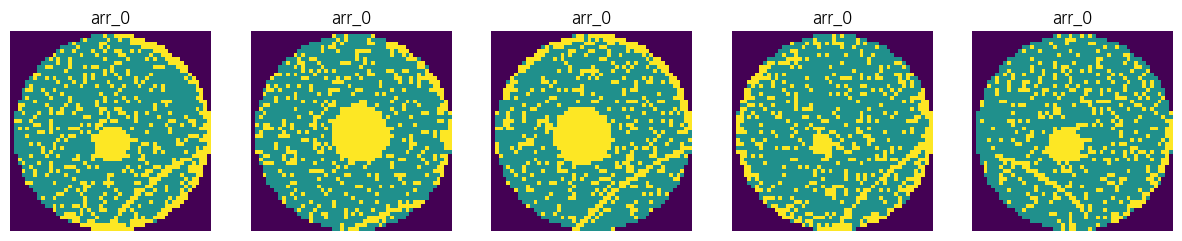

In [ ]:
# 샘플 하나의 벡터값을 출력하는 함수
def print_sample_vector(data, key, index=0):
    sample = data[key][index]
    print(f"{key}의 {index}번째 샘플 벡터값:")
    print(sample)

# 첫 번째 키의 첫 번째 샘플 벡터값 출력
print_sample_vector(dataset, 'arr_0', 0)

# 이미지 시각화 함수
def visualize_images(images, title, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(num_images, images.shape[0])):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])  # 이미지가 흑백일 경우 cmap='gray' 추가
        plt.title(title)
        plt.axis('off')
    plt.show()

# 첫 번째 키의 데이터 시각화
visualize_images(dataset['arr_0'], "arr_0")

첫 번째 이미지 데이터 형태: (52, 52)
첫 번째 레이블 데이터: [1 0 1 0 0 0 1 0]


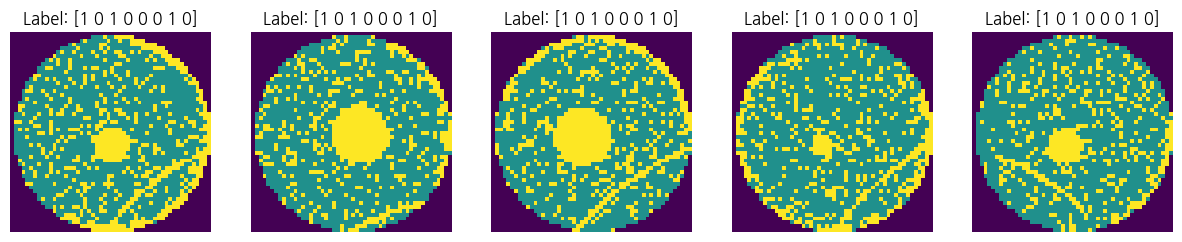

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 이미지와 레이블 분리
images = dataset['arr_0']
labels = dataset['arr_1']

# 데이터의 이미지와 레이블 예시 출력
print("첫 번째 이미지 데이터 형태:", images[0].shape)
print("첫 번째 레이블 데이터:", labels[0])

# 이미지 시각화 함수
def visualize_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(num_images, images.shape[0])):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# 처음 몇 개의 이미지와 레이블 시각화
visualize_images(images, labels)


In [ ]:
# 이미지 데이터의 벡터 구성요소 확인
def extract_unique_vector_values(images):
    unique_values = set()
    for img in images:
        unique_values.update(np.unique(img))
    return unique_values

# images에서 벡터 값 종류 추출
unique_vector_values = extract_unique_vector_values(images)
print(f"샘플 데이터의 벡터 값 종류: {unique_vector_values}")

샘플 데이터의 벡터 값 종류: {0, 1, 2, 3}


In [ ]:
import numpy as np



# 벡터 값 3이 포함된 이미지의 밀도 계산 함수
def calculate_density_for_value(images, value=3):
    value_counts = 0
    total_counts = 0

    for img in images:
        unique, counts = np.unique(img, return_counts=True)
        count_dict = dict(zip(unique, counts))
        value_counts += count_dict.get(value, 0)
        total_counts += img.size

    density = (value_counts / total_counts) * 100
    return density

# 벡터 값 3의 밀도 계산
density_value_3 = calculate_density_for_value(images, value=3)
print(f"벡터 값 3의 전체 데이터셋에서의 밀도: {density_value_3:.6f}%")


벡터 값 3의 전체 데이터셋에서의 밀도: 0.000208%


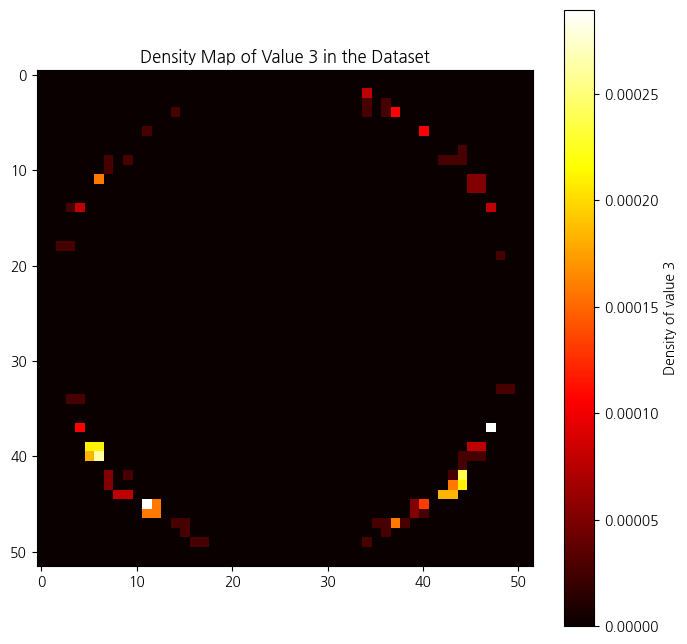

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 벡터 값 3이 포함된 이미지의 밀도 계산 함수
def calculate_density_map_for_value(images, value=3):
    density_map = np.zeros(images[0].shape, dtype=np.float32)

    for img in images:
        mask = (img == value)
        density_map += mask.astype(np.float32)

    density_map /= len(images)
    return density_map

# 벡터 값 3의 밀도 맵 계산
density_map_value_3 = calculate_density_map_for_value(images, value=3)

# 밀도 맵 시각화
plt.figure(figsize=(8, 8))
plt.imshow(density_map_value_3, cmap='hot', interpolation='nearest')
plt.colorbar(label='Density of value 3')
plt.title('Density Map of Value 3 in the Dataset')
plt.show()


원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스: [33003, 33006, 33010, 33019, 33029, 33039, 33040, 33045, 33065, 33070, 33088, 33102, 33114, 33141, 33148, 33155, 33180, 33181, 33182, 33183, 33186, 33188, 33191, 33193, 33194, 33196, 33197, 33226, 33227, 33228, 33236, 33238, 33245, 33247, 33248, 33249, 33250, 33255, 33264, 33265, 33267, 33282, 33287, 33295, 33305, 33307, 33310, 33321, 33329, 33342, 33361, 33365, 33376, 33386, 33425, 33476, 33479, 33481, 33482, 33497, 33501, 33502, 33506, 33508, 33511, 33512, 33514, 33529, 33540, 33556, 33562, 33574, 33577, 33593, 33602, 33603, 33608, 33622, 33624, 33643, 33657, 33666, 33669, 33675, 33678, 33725, 33744, 33745, 33746, 33757, 33765, 33769, 33815, 33829, 33833, 33834, 33847, 34867, 34886, 34892, 34903, 34923, 34924, 34926, 34934]
벡터 값 3이 포함된 이미지 인덱스 전체: [33003, 33006, 33010, 33019, 33029, 33039, 33040, 33045, 33065, 33070, 33088, 33102, 33114, 33141, 33148, 33155, 33180, 33181, 33182, 33183, 33186, 33188, 33191, 33193, 33194, 33196, 33197, 33226, 33227, 33228

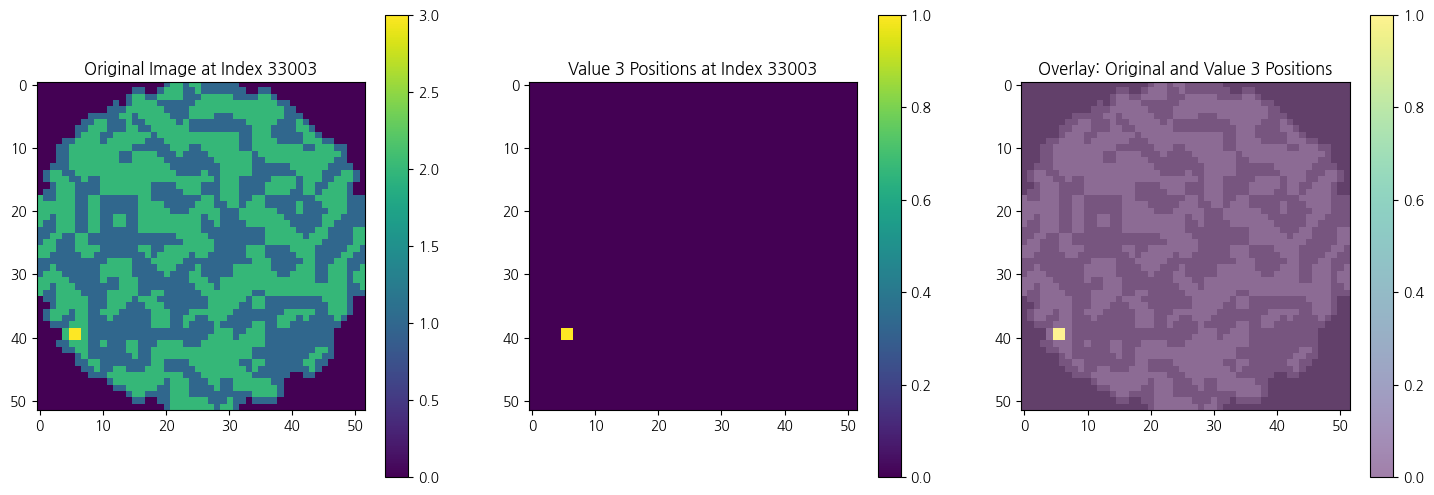

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 특정 값이 포함된 이미지를 찾는 함수
def find_images_with_value(images, value=3):
    indices_with_value = [i for i, img in enumerate(images) if value in np.unique(img)]
    return indices_with_value

# 원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스 찾기
indices_with_value_3 = find_images_with_value(images, value=3)
print(f"원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스: {indices_with_value_3}")

# 벡터 값 3이 포함된 이미지 시각화 및 값 3의 위치만 표시하는 함수
def visualize_image_with_value_positions(images, index, value=3):
    img = images[index]
    mask = (img == value)

    plt.figure(figsize=(18, 6))

    # 원본 이미지 시각화
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.colorbar()
    plt.title(f"Original Image at Index {index}")

    # 값 3의 위치만 시각화
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='viridis')
    plt.colorbar()
    plt.title(f"Value {value} Positions at Index {index}")

    # 원본 이미지와 값 3의 위치를 겹쳐서 시각화
    plt.subplot(1, 3, 3)
    plt.imshow(img, cmap='gray', alpha=0.5)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.title(f"Overlay: Original and Value {value} Positions")

    plt.show()

# 인덱스를 출력하고 하나의 이미지 선택하여 시각화
if indices_with_value_3:
    print(f"벡터 값 3이 포함된 이미지 인덱스 전체: {indices_with_value_3}")

    # 첫 번째 인덱스 선택
    selected_index = indices_with_value_3[0]

    # 선택한 이미지 시각화
    visualize_image_with_value_positions(images, selected_index)
else:
    print("벡터 값 3이 포함된 이미지가 없습니다.")


In [ ]:
# 데이터 불균형 조사
def investigate_imbalance(labels):
    # 각 레이블의 빈도 계산
    unique_labels, counts = np.unique(labels, axis=0, return_counts=True)
    print("Label distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"{label}: {count}")

investigate_imbalance(labels)

Label distribution:
[0 0 0 0 0 0 0 0]: 1000
[0 0 0 0 0 0 0 1]: 866
[0 0 0 0 0 0 1 0]: 1000
[0 0 0 0 0 1 0 0]: 149
[0 0 0 0 1 0 0 0]: 1000
[0 0 0 0 1 0 1 0]: 1000
[0 0 0 1 0 0 0 0]: 1000
[0 0 0 1 0 0 1 0]: 1000
[0 0 0 1 1 0 0 0]: 1000
[0 0 0 1 1 0 1 0]: 1000
[0 0 1 0 0 0 0 0]: 1000
[0 0 1 0 0 0 1 0]: 1000
[0 0 1 0 1 0 0 0]: 1000
[0 0 1 0 1 0 1 0]: 1000
[0 1 0 0 0 0 0 0]: 1000
[0 1 0 0 0 0 1 0]: 1000
[0 1 0 0 1 0 0 0]: 1000
[0 1 0 0 1 0 1 0]: 1000
[0 1 0 1 0 0 0 0]: 1000
[0 1 0 1 0 0 1 0]: 1000
[0 1 0 1 1 0 0 0]: 1000
[0 1 0 1 1 0 1 0]: 1000
[0 1 1 0 0 0 0 0]: 1000
[0 1 1 0 0 0 1 0]: 1000
[0 1 1 0 1 0 0 0]: 1000
[0 1 1 0 1 0 1 0]: 1000
[1 0 0 0 0 0 0 0]: 1000
[1 0 0 0 0 0 1 0]: 1000
[1 0 0 0 1 0 0 0]: 1000
[1 0 0 0 1 0 1 0]: 1000
[1 0 0 1 0 0 0 0]: 1000
[1 0 0 1 0 0 1 0]: 1000
[1 0 0 1 1 0 0 0]: 1000
[1 0 0 1 1 0 1 0]: 1000
[1 0 1 0 0 0 0 0]: 1000
[1 0 1 0 0 0 1 0]: 2000
[1 0 1 0 1 0 0 0]: 1000
[1 0 1 0 1 0 1 0]: 1000


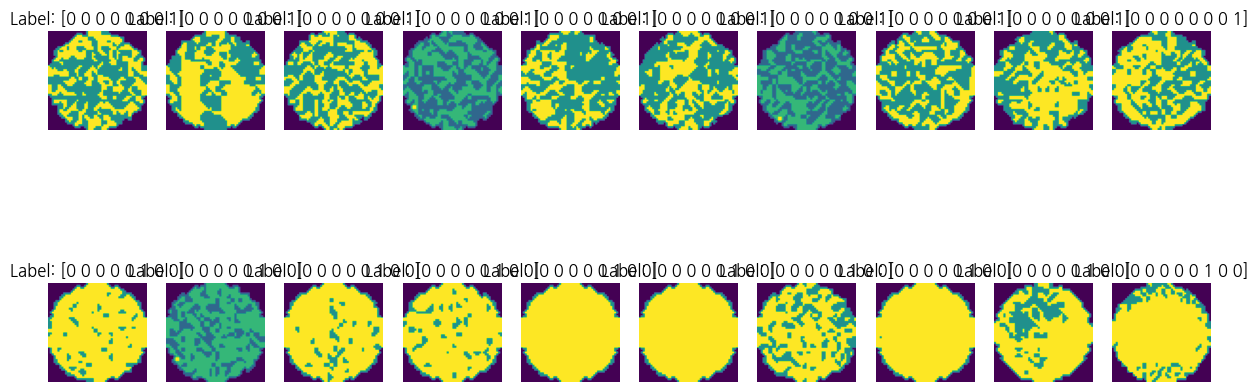

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 원하는 레이블을 가진 이미지 찾기 및 시각화 함수
def visualize_labeled_images(images, labels, target_labels, num_images=10):
    fig, axs = plt.subplots(len(target_labels), num_images, figsize=(15, 3 * len(target_labels)))
    for idx, target_label in enumerate(target_labels):
        target_indices = [i for i, label in enumerate(labels) if np.array_equal(label, target_label)]
        selected_indices = target_indices[:num_images]
        for j, image_index in enumerate(selected_indices):
            if len(target_labels) > 1:
                ax = axs[idx, j]
            else:
                ax = axs[j]
            ax.imshow(images[image_index])
            ax.set_title(f"Label: {target_label}")
            ax.axis('off')
    plt.show()

# 설정한 레이블에 따라 이미지 시각화
target_labels = [
    np.array([0, 0, 0, 0, 0, 0, 0, 1]),  # 레이블 설정 -> near-full
    np.array([0, 0, 0, 0, 0, 1, 0, 0])   # 레이블 설정 -> random
]

visualize_labeled_images(images, labels, target_labels)


첫 번째 이미지 데이터 형태: (52, 52)
첫 번째 레이블 데이터: [1 0 1 0 0 0 1 0]


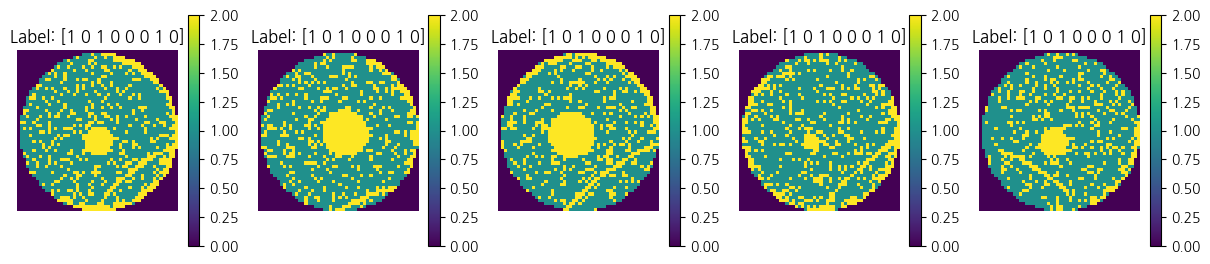

필터링 후 첫 번째 이미지 데이터 형태: (52, 52)
필터링 후 첫 번째 레이블 데이터: [1 0 1 0 0 0 1 0]


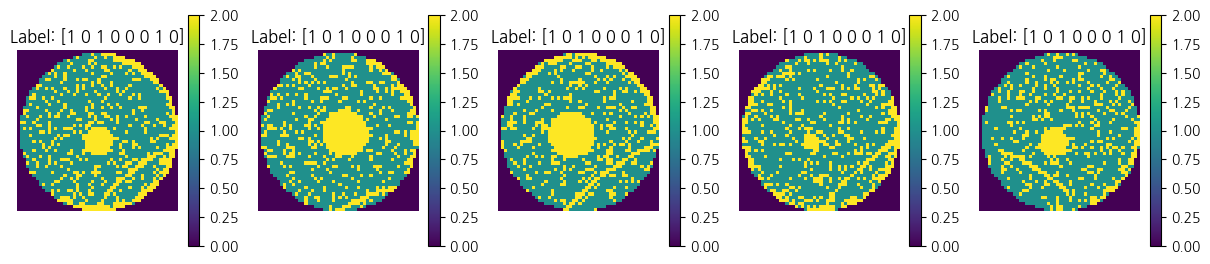

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 파일 경로
data_path = '/content/drive/MyDrive/반도체 캐글_mix/Wafer_Map_Datasets.npz'

# 데이터 로드
dataset = np.load(data_path)

# 이미지와 레이블 분리
images = dataset['arr_0']
labels = dataset['arr_1']

# 데이터의 이미지와 레이블 예시 출력
print("첫 번째 이미지 데이터 형태:", images[0].shape)
print("첫 번째 레이블 데이터:", labels[0])

# 이미지 시각화 함수
def visualize_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(num_images, images.shape[0])):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.colorbar()
    plt.show()

# 처음 몇 개의 이미지와 레이블 시각화
visualize_images(images, labels)

# 이미지 필터링 함수
def filter_images_by_pixel_values(images, labels, valid_values={0, 1, 2}):
    mask = np.all(np.isin(images, list(valid_values)), axis=(1, 2))
    filtered_images = images[mask]
    filtered_labels = labels[mask]
    return filtered_images, filtered_labels

# 유효한 값만 가진 이미지 필터링
filtered_images, filtered_labels = filter_images_by_pixel_values(images, labels)

# 필터링된 데이터의 이미지와 레이블 예시 출력
print("필터링 후 첫 번째 이미지 데이터 형태:", filtered_images[0].shape)
print("필터링 후 첫 번째 레이블 데이터:", filtered_labels[0])

# 필터링된 이미지와 레이블 시각화
visualize_images(filtered_images, filtered_labels)

In [ ]:
images = filtered_images
labels = filtered_labels

In [ ]:
# 패턴 이름과 레이블 매핑
pattern_names = {
    (0, 0, 0, 0, 0, 0, 0, 0): "Normal",
    (0, 0, 0, 0, 0, 0, 0, 1): "Near_Full",
    (0, 0, 0, 0, 0, 0, 1, 0): "Scratch",
    (0, 0, 0, 0, 0, 1, 0, 0): "Random",
    (0, 0, 0, 0, 1, 0, 0, 0): "Loc",
    (0, 0, 0, 0, 1, 0, 1, 0): "Loc+Scratch",
    (0, 0, 0, 1, 0, 0, 0, 0): "Edge_Ring",
    (0, 0, 0, 1, 0, 0, 1, 0): "Edge_Ring+Scratch",
    (0, 0, 0, 1, 1, 0, 0, 0): "Edge_Ring+Loc",
    (0, 0, 0, 1, 1, 0, 1, 0): "Edge_Ring+Loc+Scratch",
    (0, 0, 1, 0, 0, 0, 0, 0): "Edge_Loc",
    (0, 0, 1, 0, 0, 0, 1, 0): "Edge_Loc+Scratch",
    (0, 0, 1, 0, 1, 0, 0, 0): "Edge_Loc+Loc",
    (0, 0, 1, 0, 1, 0, 1, 0): "Edge_Loc+Loc+Scratch",
    (0, 1, 0, 0, 0, 0, 0, 0): "Donut",
    (0, 1, 0, 0, 0, 0, 1, 0): "Donut+Scratch",
    (0, 1, 0, 0, 1, 0, 0, 0): "Donut+Loc",
    (0, 1, 0, 0, 1, 0, 1, 0): "Donut+Loc+Scratch",
    (0, 1, 0, 1, 0, 0, 0, 0): "Donut+Edge_Ring",
    (0, 1, 0, 1, 0, 0, 1, 0): "Donut+Edge_Ring+Scratch",
    (0, 1, 0, 1, 1, 0, 0, 0): "Donut+Edge_Ring+Loc",
    (0, 1, 0, 1, 1, 0, 1, 0): "Donut+Edge_Ring+Loc+Scratch",
    (0, 1, 1, 0, 0, 0, 0, 0): "Donut+Edge_Loc",
    (0, 1, 1, 0, 0, 0, 1, 0): "Donut+Edge_Loc+Scratch",
    (0, 1, 1, 0, 1, 0, 0, 0): "Donut+Edge_Loc+Loc",
    (0, 1, 1, 0, 1, 0, 1, 0): "Donut+Edge_Loc+Loc+Scratch",
    (1, 0, 0, 0, 0, 0, 0, 0): "Center",
    (1, 0, 0, 0, 0, 0, 1, 0): "Center+Scratch",
    (1, 0, 0, 0, 1, 0, 0, 0): "Center+Loc",
    (1, 0, 0, 0, 1, 0, 1, 0): "Center+Loc+Scratch",
    (1, 0, 0, 1, 0, 0, 0, 0): "Center+Edge_Ring",
    (1, 0, 0, 1, 0, 0, 1, 0): "Center+Edge_Ring+Scratch",
    (1, 0, 0, 1, 1, 0, 0, 0): "Center+Edge_Ring+Loc",
    (1, 0, 0, 1, 1, 0, 1, 0): "Center+Edge_Ring+Loc+Scratch",
    (1, 0, 1, 0, 0, 0, 0, 0): "Center+Edge_Loc",
    (1, 0, 1, 0, 0, 0, 1, 0): "Center+Edge_Loc+Scratch",
    (1, 0, 1, 0, 1, 0, 0, 0): "Center+Edge_Loc+Loc",
    (1, 0, 1, 0, 1, 0, 1, 0): "Center+Edge_Loc+Loc+Scratch"
}



In [ ]:
# 데이터 불균형 조사
def investigate_imbalance(labels):
    unique_labels, counts = np.unique(labels, axis=0, return_counts=True)
    print("Label distribution:")
    for label, count in zip(unique_labels, counts):
        label_tuple = tuple(label)
        pattern_name = pattern_names.get(label_tuple, "Unknown Pattern")
        print(f"{pattern_name} ({label}): {count}")

investigate_imbalance(labels)

Label distribution:
Normal ([0 0 0 0 0 0 0 0]): 1000
Near_Full ([0 0 0 0 0 0 0 1]): 769
Scratch ([0 0 0 0 0 0 1 0]): 1000
Random ([0 0 0 0 0 1 0 0]): 141
Loc ([0 0 0 0 1 0 0 0]): 1000
Loc+Scratch ([0 0 0 0 1 0 1 0]): 1000
Edge_Ring ([0 0 0 1 0 0 0 0]): 1000
Edge_Ring+Scratch ([0 0 0 1 0 0 1 0]): 1000
Edge_Ring+Loc ([0 0 0 1 1 0 0 0]): 1000
Edge_Ring+Loc+Scratch ([0 0 0 1 1 0 1 0]): 1000
Edge_Loc ([0 0 1 0 0 0 0 0]): 1000
Edge_Loc+Scratch ([0 0 1 0 0 0 1 0]): 1000
Edge_Loc+Loc ([0 0 1 0 1 0 0 0]): 1000
Edge_Loc+Loc+Scratch ([0 0 1 0 1 0 1 0]): 1000
Donut ([0 1 0 0 0 0 0 0]): 1000
Donut+Scratch ([0 1 0 0 0 0 1 0]): 1000
Donut+Loc ([0 1 0 0 1 0 0 0]): 1000
Donut+Loc+Scratch ([0 1 0 0 1 0 1 0]): 1000
Donut+Edge_Ring ([0 1 0 1 0 0 0 0]): 1000
Donut+Edge_Ring+Scratch ([0 1 0 1 0 0 1 0]): 1000
Donut+Edge_Ring+Loc ([0 1 0 1 1 0 0 0]): 1000
Donut+Edge_Ring+Loc+Scratch ([0 1 0 1 1 0 1 0]): 1000
Donut+Edge_Loc ([0 1 1 0 0 0 0 0]): 1000
Donut+Edge_Loc+Scratch ([0 1 1 0 0 0 1 0]): 1000
Donut+Edge_L

Label (0, 0, 0, 0, 0, 1, 0, 0) count: 141
Label (0, 0, 0, 0, 0, 0, 0, 1) count: 769
증강 후 각 레이블의 개수: {(0, 0, 0, 0, 0, 0, 0, 1): 231, (0, 0, 0, 0, 0, 1, 0, 0): 859}
최종 데이터 각 레이블의 개수: {(0, 0, 0, 0, 0, 0, 0, 0): 1000, (0, 0, 0, 0, 0, 0, 0, 1): 1000, (0, 0, 0, 0, 0, 0, 1, 0): 1000, (0, 0, 0, 0, 0, 1, 0, 0): 1000, (0, 0, 0, 0, 1, 0, 0, 0): 1000, (0, 0, 0, 0, 1, 0, 1, 0): 1000, (0, 0, 0, 1, 0, 0, 0, 0): 1000, (0, 0, 0, 1, 0, 0, 1, 0): 1000, (0, 0, 0, 1, 1, 0, 0, 0): 1000, (0, 0, 0, 1, 1, 0, 1, 0): 1000, (0, 0, 1, 0, 0, 0, 0, 0): 1000, (0, 0, 1, 0, 0, 0, 1, 0): 1000, (0, 0, 1, 0, 1, 0, 0, 0): 1000, (0, 0, 1, 0, 1, 0, 1, 0): 1000, (0, 1, 0, 0, 0, 0, 0, 0): 1000, (0, 1, 0, 0, 0, 0, 1, 0): 1000, (0, 1, 0, 0, 1, 0, 0, 0): 1000, (0, 1, 0, 0, 1, 0, 1, 0): 1000, (0, 1, 0, 1, 0, 0, 0, 0): 1000, (0, 1, 0, 1, 0, 0, 1, 0): 1000, (0, 1, 0, 1, 1, 0, 0, 0): 1000, (0, 1, 0, 1, 1, 0, 1, 0): 1000, (0, 1, 1, 0, 0, 0, 0, 0): 1000, (0, 1, 1, 0, 0, 0, 1, 0): 1000, (0, 1, 1, 0, 1, 0, 0, 0): 1000, (0, 1, 1, 0, 1, 0,

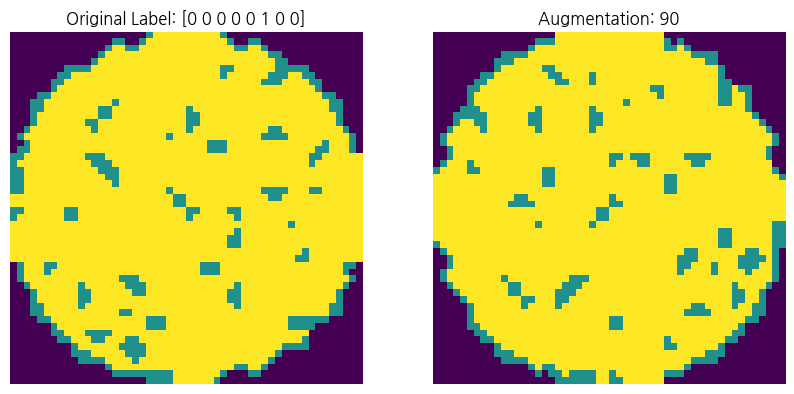

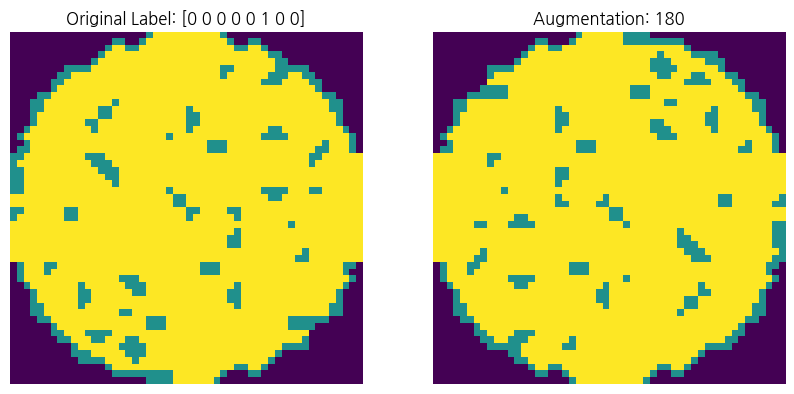

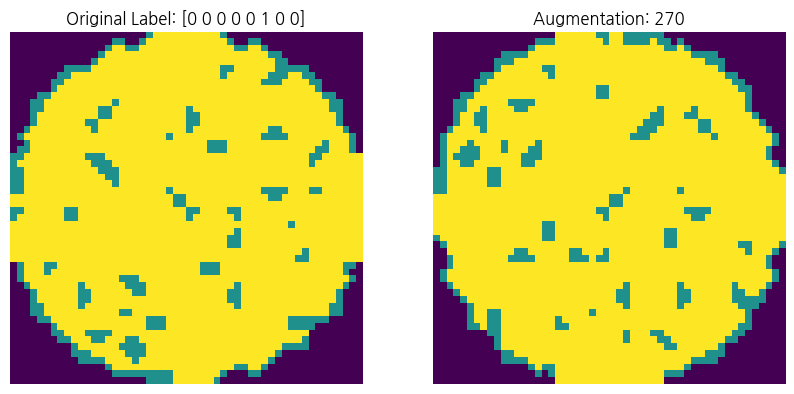

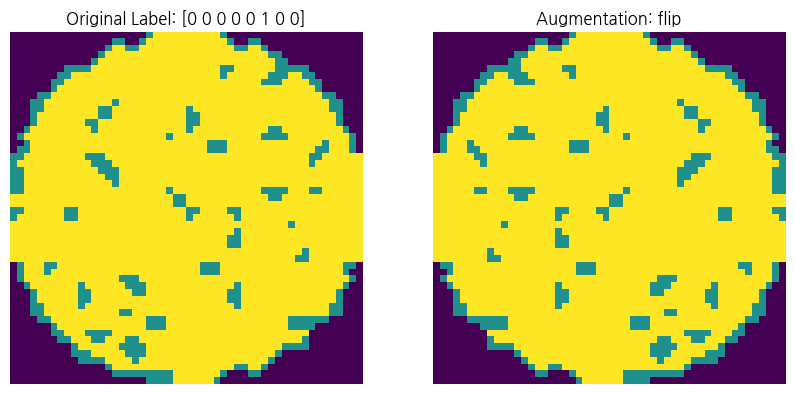

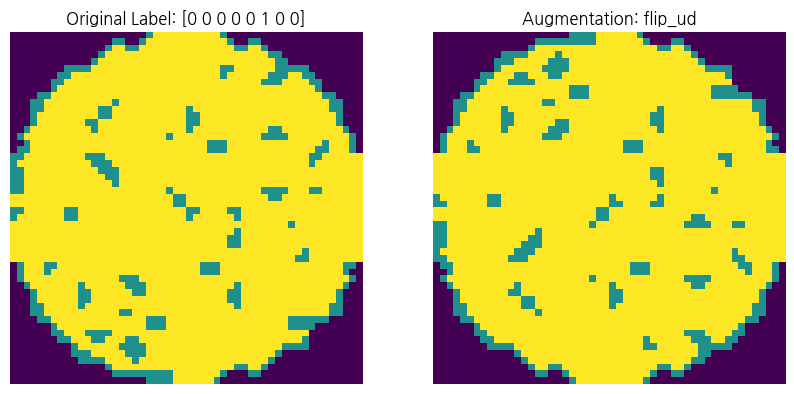

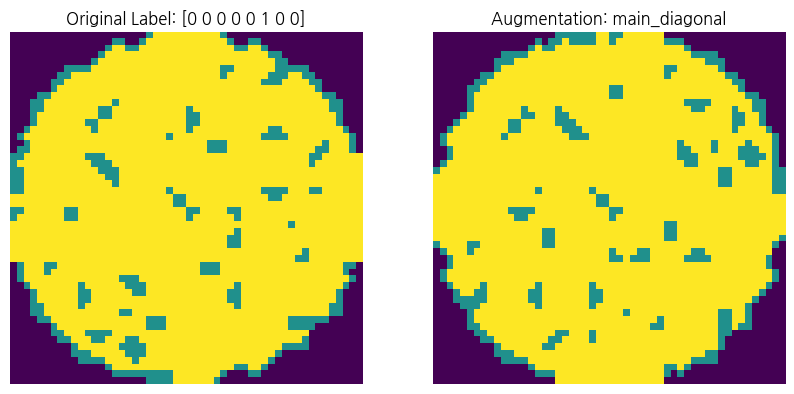

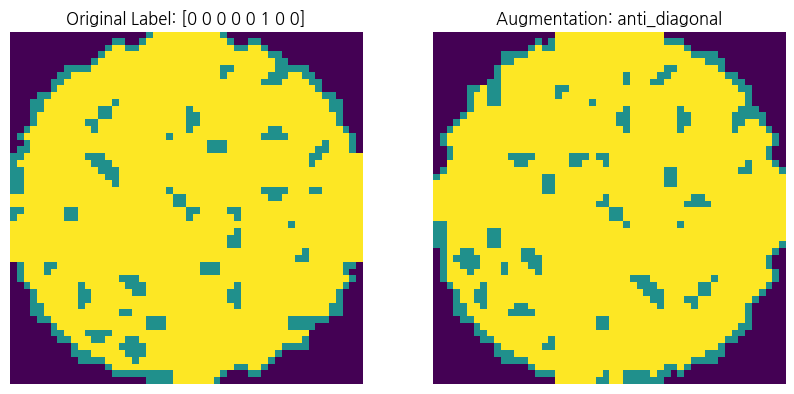

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# 증강할 레이블 지정
labels_to_augment = [(0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1)]

# 주 대각선 반전 함수
def flip_main_diagonal(img):
    return np.transpose(img)

# 부 대각선 반전 함수
def flip_anti_diagonal(img):
    return np.fliplr(np.flipud(np.transpose(img)))

# 데이터 증강 함수
def augment_data(images, labels, target_count=1000):
    augmented_images = []
    augmented_labels = []
    augmentation_types = []

    for label in labels_to_augment:
        label_images = images[np.all(labels == label, axis=1)]
        num_images = label_images.shape[0]
        augmentations = [90, 180, 270, 'flip', 'flip_ud', 'main_diagonal', 'anti_diagonal']
        print(f"Label {label} count: {num_images}")

        for aug in augmentations:
            for img in label_images:
                if num_images >= target_count:
                    break
                if aug == 'flip':
                    augmented_img = np.fliplr(img)
                elif aug == 'flip_ud':
                    augmented_img = np.flipud(img)
                elif aug == 'main_diagonal':
                    augmented_img = flip_main_diagonal(img)
                elif aug == 'anti_diagonal':
                    augmented_img = flip_anti_diagonal(img)
                else:
                    augmented_img = rotate(img, aug, reshape=False)
                augmented_images.append(augmented_img)
                augmented_labels.append(label)
                augmentation_types.append(aug)
                num_images += 1
                if num_images >= target_count:
                    break

    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)
    return augmented_images, augmented_labels, augmentation_types

# 데이터 증강
augmented_images, augmented_labels, augmentation_types = augment_data(images, labels)

# 증강 후 레이블 개수 확인
unique_labels, counts = np.unique(augmented_labels, axis=0, return_counts=True)
print("증강 후 각 레이블의 개수:", dict(zip(map(tuple, unique_labels), counts)))

# 증강된 데이터와 기존 데이터를 합치기
final_images = np.concatenate((images, augmented_images))
final_labels = np.concatenate((labels, augmented_labels))

# 최종 데이터의 레이블 개수 확인
unique_labels, counts = np.unique(final_labels, axis=0, return_counts=True)
print("최종 데이터 각 레이블의 개수:", dict(zip(map(tuple, unique_labels), counts)))

# 증강된 방식별 이미지 시각화 함수
def visualize_augmentations(augmented_images, augmented_labels, augmentation_types, original_images, original_labels):
    augmentations = [90, 180, 270, 'flip', 'flip_ud', 'main_diagonal', 'anti_diagonal']
    for aug in augmentations:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # 증강된 이미지 선택 및 시각화
        for i, aug_type in enumerate(augmentation_types):
            if aug_type == aug:
                aug_img = augmented_images[i]
                aug_label = augmented_labels[i]

                # 원본 이미지 선택 및 시각화
                original_img = original_images[np.all(original_labels == aug_label, axis=1)][0]
                axs[0].imshow(original_img)
                axs[0].set_title(f"Original Label: {aug_label}")
                axs[0].axis('off')

                axs[1].imshow(aug_img)
                axs[1].set_title(f"Augmentation: {aug}")
                axs[1].axis('off')

                plt.show()
                break

# 증강된 방식별 이미지 시각화
visualize_augmentations(augmented_images, augmented_labels, augmentation_types, images, labels)


하지마

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate



# 증강할 레이블 지정
labels_to_augment = [(0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1)]

# 데이터 증강 함수
def augment_data(images, labels, target_count=1000):
    augmented_images = []
    augmented_labels = []
    for label in labels_to_augment:
        label_images = images[np.all(labels == label, axis=1)]
        num_images = label_images.shape[0]
        augmentations = [90, 180, 270, 'flip']
        print(f"Label {label} count: {num_images}")

        for aug in augmentations:
            if num_images >= target_count:
                break
            for img in label_images:
                if num_images >= target_count:
                    break
                if aug == 'flip':
                    augmented_img = np.fliplr(img)
                else:
                    augmented_img = rotate(img, aug, reshape=False)
                augmented_images.append(augmented_img)
                augmented_labels.append(label)
                num_images += 1
                if num_images >= target_count:
                    break

    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)
    return augmented_images, augmented_labels

# 데이터 증강
augmented_images, augmented_labels = augment_data(images, labels)

# 증강 후 레이블 개수 확인
unique_labels, counts = np.unique(augmented_labels, axis=0, return_counts=True)
print("증강 후 각 레이블의 개수:", dict(zip(map(tuple, unique_labels), counts)))

# 증강된 데이터와 기존 데이터를 합치기
final_images = np.concatenate((images, augmented_images))
final_labels = np.concatenate((labels, augmented_labels))

# 최종 데이터의 레이블 개수 확인
unique_labels, counts = np.unique(final_labels, axis=0, return_counts=True)
print("최종 데이터 각 레이블의 개수:", dict(zip(map(tuple, unique_labels), counts)))



Label (0, 0, 0, 0, 0, 1, 0, 0) count: 141
Label (0, 0, 0, 0, 0, 0, 0, 1) count: 769
증강 후 각 레이블의 개수: {(0, 0, 0, 0, 0, 0, 0, 1): 231, (0, 0, 0, 0, 0, 1, 0, 0): 564}
최종 데이터 각 레이블의 개수: {(0, 0, 0, 0, 0, 0, 0, 0): 1000, (0, 0, 0, 0, 0, 0, 0, 1): 1000, (0, 0, 0, 0, 0, 0, 1, 0): 1000, (0, 0, 0, 0, 0, 1, 0, 0): 705, (0, 0, 0, 0, 1, 0, 0, 0): 1000, (0, 0, 0, 0, 1, 0, 1, 0): 1000, (0, 0, 0, 1, 0, 0, 0, 0): 1000, (0, 0, 0, 1, 0, 0, 1, 0): 1000, (0, 0, 0, 1, 1, 0, 0, 0): 1000, (0, 0, 0, 1, 1, 0, 1, 0): 1000, (0, 0, 1, 0, 0, 0, 0, 0): 1000, (0, 0, 1, 0, 0, 0, 1, 0): 1000, (0, 0, 1, 0, 1, 0, 0, 0): 1000, (0, 0, 1, 0, 1, 0, 1, 0): 1000, (0, 1, 0, 0, 0, 0, 0, 0): 1000, (0, 1, 0, 0, 0, 0, 1, 0): 1000, (0, 1, 0, 0, 1, 0, 0, 0): 1000, (0, 1, 0, 0, 1, 0, 1, 0): 1000, (0, 1, 0, 1, 0, 0, 0, 0): 1000, (0, 1, 0, 1, 0, 0, 1, 0): 1000, (0, 1, 0, 1, 1, 0, 0, 0): 1000, (0, 1, 0, 1, 1, 0, 1, 0): 1000, (0, 1, 1, 0, 0, 0, 0, 0): 1000, (0, 1, 1, 0, 0, 0, 1, 0): 1000, (0, 1, 1, 0, 1, 0, 0, 0): 1000, (0, 1, 1, 0, 1, 0, 

다시 해

샘플 인덱스: 29522
샘플 레이블: [0 0 0 1 1 0 1 0]


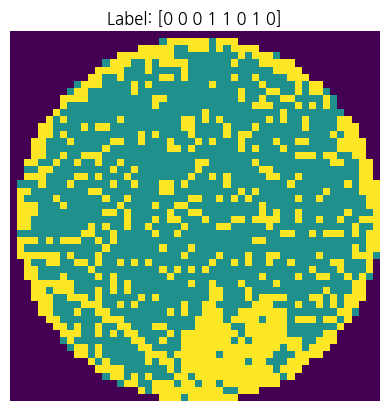

In [ ]:
# 샘플 하나를 랜덤하게 선택하여 출력하는 함수
def print_sample(images, labels):
    index = np.random.randint(len(images))
    sample_image = images[index]
    sample_label = labels[index]
    print(f"샘플 인덱스: {index}")
    print(f"샘플 레이블: {sample_label}")
    plt.imshow(sample_image) #cmap='gray'
    plt.title(f"Label: {sample_label}")
    plt.axis('off')
    plt.show()

# 샘플 하나 출력
print_sample(final_images, final_labels)

In [ ]:
import numpy as np

# 샘플 데이터의 벡터 값 종류 도출
def extract_unique_vector_values(images):
    unique_values = set()
    for img in images:
        unique_values.update(np.unique(img))
    return unique_values

# 최종 데이터셋에서 벡터 값 종류 추출
unique_vector_values = extract_unique_vector_values(final_images)
print(f"샘플 데이터의 벡터 값 종류: {unique_vector_values}")


샘플 데이터의 벡터 값 종류: {0, 1, 2}


Value counts:
Value 0: 24892800 counts
Value 1: 53837746 counts
Value 2: 26725454 counts

Density (%):
Value 0: 23.60%
Value 1: 51.05%
Value 2: 25.34%


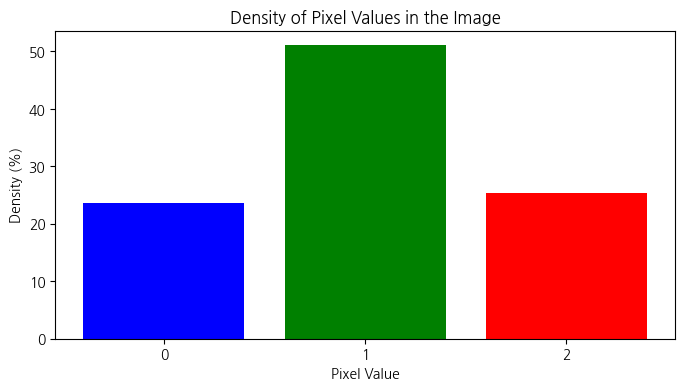

In [ ]:
# 0, 1, 2 값의 개수 계산
values, counts = np.unique(final_images, return_counts=True)
density = counts / final_images.size * 100  # 밀도를 퍼센트로 계산

# 결과 출력
print("Value counts:")
for value, count in zip(values, counts):
    print(f"Value {value}: {count} counts")

print("\nDensity (%):")
for value, dens in zip(values, density):
    print(f"Value {value}: {dens:.2f}%")

# 밀도를 그래픽으로 표현
plt.figure(figsize=(8, 4))
plt.bar(values, density, color=['blue', 'green', 'red'])
plt.xlabel('Pixel Value')
plt.ylabel('Density (%)')
plt.title('Density of Pixel Values in the Image')
plt.xticks(values)
plt.show()


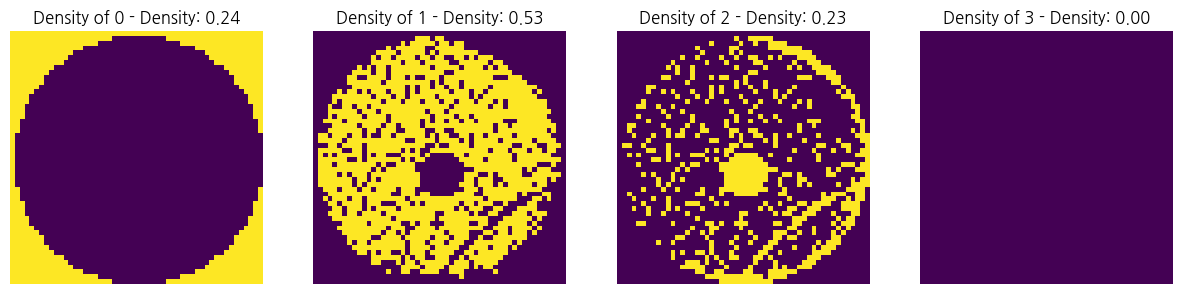

In [ ]:
# 특정 이미지 선택
image_index = 1000  # 이 값은 필요에 따라 변경 가능
selected_image = images[image_index]

# 값 0, 1, 2의 밀도 맵 생성 및 시각화
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
values = [0, 1, 2, 3]
titles = ['Density of 0', 'Density of 1', 'Density of 2', 'Density of 3']

for i, value in enumerate(values):
    # 특정 값에 대한 마스크 생성
    mask = selected_image == value
    # 밀도 계산 (마스크의 True 개수를 총 픽셀 수로 나눔)
    density = np.sum(mask) / mask.size
    # 밀도 맵 시각화
    ax = axes[i]
    ax.imshow(mask, interpolation='nearest') # cmap='Greys'
    ax.set_title(f'{titles[i]} - Density: {density:.2f}')
    ax.axis('off')

plt.show()

원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


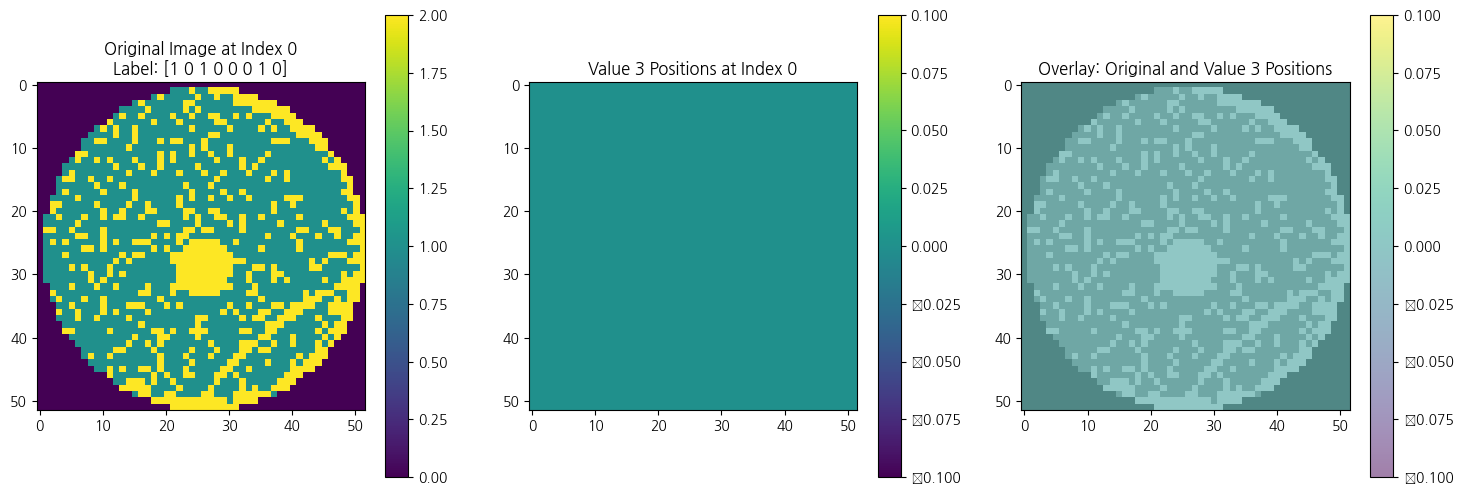

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 특정 값이 포함된 이미지를 찾는 함수
def find_images_with_value(images, value=2):
    indices_with_value = [i for i, img in enumerate(images) if value in np.unique(img)]
    return indices_with_value

# 원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스 찾기
indices_with_value_3 = find_images_with_value(images, value=2)
print(f"원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스: {indices_with_value_3}")

# 해당 인덱스의 레이블 빈도 계산 함수
def count_labels_for_indices(labels, indices):
    label_counts = {}
    for index in indices:
        label = tuple(labels[index])
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    return label_counts

# 벡터 값 3이 포함된 이미지의 레이블 빈도 계산
label_counts_with_value_3 = count_labels_for_indices(labels, indices_with_value_3)
print(f"벡터 값 3이 포함된 이미지의 레이블 빈도: {label_counts_with_value_3}")

# 벡터 값 3이 포함된 이미지 시각화 및 값 3의 위치만 표시하는 함수
def visualize_image_with_value_positions(images, labels, index, value=3):
    img = images[index]
    label = labels[index]
    mask = (img == value)

    plt.figure(figsize=(18, 6))

    # 원본 이미지 시각화
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.colorbar()
    plt.title(f"Original Image at Index {index}\nLabel: {label}")

    # 값 3의 위치만 시각화
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='viridis')
    plt.colorbar()
    plt.title(f"Value {value} Positions at Index {index}")

    # 원본 이미지와 값 3의 위치를 겹쳐서 시각화
    plt.subplot(1, 3, 3)
    plt.imshow(img, cmap='gray', alpha=0.5)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.title(f"Overlay: Original and Value {value} Positions")

    plt.show()

# 인덱스를 출력하고 하나의 이미지 선택하여 시각화
if indices_with_value_3:
    print(f"벡터 값 3이 포함된 이미지 인덱스 전체: {indices_with_value_3}")
    print(f"벡터 값 3이 포함된 이미지의 레이블 빈도: {label_counts_with_value_3}")

    # 첫 번째 인덱스 선택
    selected_index = indices_with_value_3[0]

    # 선택한 이미지 시각화
    visualize_image_with_value_positions(images, labels, selected_index)
else:
    print("벡터 값 3이 포함된 이미지가 없습니다.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 특정 값이 포함된 이미지를 찾는 함수
def find_images_with_value(images, value=3):
    indices_with_value = [i for i, img in enumerate(images) if value in np.unique(img)]
    return indices_with_value

# 원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스 찾기
indices_with_value_3 = find_images_with_value(images, value=3)
print(f"원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스: {indices_with_value_3}")

# 해당 인덱스의 레이블 빈도 계산 함수
def count_labels_for_indices(labels, indices):
    label_counts = {}
    for index in indices:
        label = tuple(labels[index])
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    return label_counts

# 벡터 값 3이 포함된 이미지의 레이블 빈도 계산
label_counts_with_value_3 = count_labels_for_indices(labels, indices_with_value_3)
print(f"벡터 값 3이 포함된 이미지의 레이블 빈도: {label_counts_with_value_3}")

# 벡터 값 3이 포함된 이미지 시각화 및 값 3의 위치만 표시하는 함수
def visualize_image_with_value_positions(images, labels, index, value=3):
    img = images[index]
    label = labels[index]
    mask = (img == value)

    plt.figure(figsize=(18, 6))

    # 원본 이미지 시각화
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.colorbar()
    plt.title(f"Original Image at Index {index}\nLabel: {label}")

    # 값 3의 위치만 시각화
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='viridis')
    plt.colorbar()
    plt.title(f"Value {value} Positions at Index {index}")

    # 원본 이미지와 값 3의 위치를 겹쳐서 시각화
    plt.subplot(1, 3, 3)
    plt.imshow(img, cmap='gray', alpha=0.5)
    plt.imshow(mask, cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.title(f"Overlay: Original and Value {value} Positions")

    plt.show()

# 모든 인덱스에 대해 이미지 시각화
if indices_with_value_3:
    print(f"벡터 값 3이 포함된 이미지 인덱스 전체: {indices_with_value_3}")
    print(f"벡터 값 3이 포함된 이미지의 레이블 빈도: {label_counts_with_value_3}")

    # 모든 인덱스에 대해 이미지 시각화
    for selected_index in indices_with_value_3:
        visualize_image_with_value_positions(images, labels, selected_index)
else:
    print("벡터 값 3이 포함된 이미지가 없습니다.")


원본 데이터셋에서 벡터 값 3이 포함된 이미지 인덱스: []
벡터 값 3이 포함된 이미지의 레이블 빈도: {}
벡터 값 3이 포함된 이미지가 없습니다.


In [ ]:
import matplotlib.pyplot as plt

def visualize_image_with_value_positions(images, labels, indices):
    for idx in indices:
        image = images[idx]
        label = labels[idx]

        # Find positions of value 3
        positions = [(i, j) for i in range(image.shape[0]) for j in range(image.shape[1]) if image[i, j] == 3]

        # Plot the image
        plt.figure(figsize=(6, 6))

        # Display the image with a colorbar
        plt.imshow(image, cmap='gray')
        plt.colorbar(label='Pixel Value')

        # Overlay the positions of value 3 with red crosses
        if positions:
            plt.scatter(*zip(*positions), c='red', marker='x')

        plt.title(f"Image Index: {idx} | Label: {label}")
        plt.show()

# Main code block to identify and visualize images with value 3
if indices_with_value_3:
    print(f"벡터 값 3이 포함된 이미지 인덱스 전체: {indices_with_value_3}")
    print(f"벡터 값 3이 포함된 이미지의 레이블 빈도: {label_counts_with_value_3}")

    # Visualize all images containing the value 3
    visualize_image_with_value_positions(images, labels, indices_with_value_3)
else:
    print("벡터 값 3이 포함된 이미지가 없습니다.")


벡터 값 3이 포함된 이미지가 없습니다.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_image_with_value_positions(images, labels, indices):
    for idx in indices:
        image = images[idx]
        label = labels[idx]

        # Find positions of value 3
        positions = [(i, j) for i in range(image.shape[0]) for j in range(image.shape[1]) if image[i, j] == 3]

        # Print positions for debugging
        print(f"Positions of value 3 in image {idx}: {positions}")

        # Plot the image
        plt.figure(figsize=(8, 8))

        # Display the image with a colorbar
        plt.imshow(image, cmap='gray')
        plt.colorbar(label='Pixel Value')

        # Overlay the positions of value 3 with red crosses
        if positions:
            y, x = zip(*positions)
            plt.scatter(x, y, c='red', marker='x', label='Value 3')

        plt.title(f"Image Index: {idx} | Label: {label}")
        plt.legend()
        plt.show()

# Assuming the previous parts of the code are defined elsewhere and correct

# Main code block to identify and visualize images with value 3
if indices_with_value_3:
    print(f"벡터 값 3이 포함된 이미지 인덱스 전체: {indices_with_value_3}")
    print(f"벡터 값 3이 포함된 이미지의 레이블 빈도: {label_counts_with_value_3}")

    # Visualize all images containing the value 3
    visualize_image_with_value_positions(images, labels, indices_with_value_3)
else:
    print("벡터 값 3이 포함된 이미지가 없습니다.")


벡터 값 3이 포함된 이미지가 없습니다.


# 전체 저장

In [ ]:
# npz 파일로 저장
output_path = '/content/drive/MyDrive/반도체 캐글_mix/Augmented_Wafer_Map_Datasets.npz'
np.savez(output_path, arr_0=final_images, arr_1=final_labels)

print(f"데이터가 {output_path}에 저장되었습니다.")

데이터가 /content/drive/MyDrive/반도체 캐글_mix/Augmented_Wafer_Map_Datasets.npz에 저장되었습니다.


# 따로 저장

In [ ]:
import numpy as np

# Define the single_normal_label set
single_normal_label_set = {
    (0, 0, 0, 0, 0, 0, 0, 0),
    (0, 0, 0, 0, 0, 0, 0, 1),
    (0, 0, 0, 0, 0, 0, 1, 0),
    (0, 0, 0, 0, 0, 1, 0, 0),
    (0, 0, 0, 0, 1, 0, 0, 0),
    (0, 0, 0, 1, 0, 0, 0, 0),
    (0, 0, 1, 0, 0, 0, 0, 0),
    (0, 1, 0, 0, 0, 0, 0, 0),
    (1, 0, 0, 0, 0, 0, 0, 0)
}

# Split the data into single_normal_label and others
def split_data(images, labels, single_normal_label_set):
    single_normal_images = []
    single_normal_labels = []
    other_images = []
    other_labels = []

    for img, lbl in zip(images, labels):
        if tuple(lbl) in single_normal_label_set:
            single_normal_images.append(img)
            single_normal_labels.append(lbl)
        else:
            other_images.append(img)
            other_labels.append(lbl)

    return (np.array(single_normal_images), np.array(single_normal_labels)), (np.array(other_images), np.array(other_labels))

# Split the augmented data
(single_normal_data, other_data) = split_data(final_images, final_labels, single_normal_label_set)

# Save the datasets to NPZ files
np.savez('/content/drive/MyDrive/반도체 캐글_mix/single_normal_label_data.npz', images=single_normal_data[0], labels=single_normal_data[1])
np.savez('/content/drive/MyDrive/반도체 캐글_mix/other_data.npz', images=other_data[0], labels=other_data[1])

print("Datasets have been saved to NPZ files.")


Datasets have been saved to NPZ files.


In [ ]:
import numpy as np
from collections import Counter

# 파일 경로
data_path = '/content/drive/MyDrive/반도체 캐글_mix/other_data.npz'

# 데이터 로드
with np.load(data_path) as data:
    labels = data['labels']
    images = data['images']

# 라벨을 튜플로 변환 (라벨이 다차원 배열인 경우)
labels_as_tuples = [tuple(label) for label in labels]

# 라벨별 빈도수 계산
label_counts = Counter(labels_as_tuples)

# 라벨과 각각의 빈도수 출력
for label, count in label_counts.items():
    print(f"Label {label}: {count}개")

# 총 데이터 수 출력
print(f"총 데이터 수: {len(labels)}개")


Label (1, 0, 1, 0, 0, 0, 1, 0): 2000개
Label (1, 0, 1, 0, 0, 0, 0, 0): 1000개
Label (1, 0, 0, 1, 0, 0, 1, 0): 1000개
Label (1, 0, 0, 1, 0, 0, 0, 0): 1000개
Label (1, 0, 1, 0, 1, 0, 1, 0): 1000개
Label (1, 0, 1, 0, 1, 0, 0, 0): 1000개
Label (1, 0, 0, 1, 1, 0, 1, 0): 1000개
Label (1, 0, 0, 1, 1, 0, 0, 0): 1000개
Label (1, 0, 0, 0, 1, 0, 1, 0): 1000개
Label (1, 0, 0, 0, 1, 0, 0, 0): 1000개
Label (1, 0, 0, 0, 0, 0, 1, 0): 1000개
Label (0, 1, 1, 0, 0, 0, 1, 0): 1000개
Label (0, 1, 1, 0, 0, 0, 0, 0): 1000개
Label (0, 1, 0, 1, 0, 0, 1, 0): 1000개
Label (0, 1, 0, 1, 0, 0, 0, 0): 1000개
Label (0, 1, 1, 0, 1, 0, 1, 0): 1000개
Label (0, 1, 1, 0, 1, 0, 0, 0): 1000개
Label (0, 1, 0, 1, 1, 0, 1, 0): 1000개
Label (0, 1, 0, 1, 1, 0, 0, 0): 1000개
Label (0, 1, 0, 0, 1, 0, 1, 0): 1000개
Label (0, 1, 0, 0, 1, 0, 0, 0): 1000개
Label (0, 1, 0, 0, 0, 0, 1, 0): 1000개
Label (0, 0, 1, 0, 1, 0, 1, 0): 1000개
Label (0, 0, 1, 0, 1, 0, 0, 0): 1000개
Label (0, 0, 0, 1, 1, 0, 1, 0): 1000개
Label (0, 0, 0, 1, 1, 0, 0, 0): 1000개
Label (0, 0,

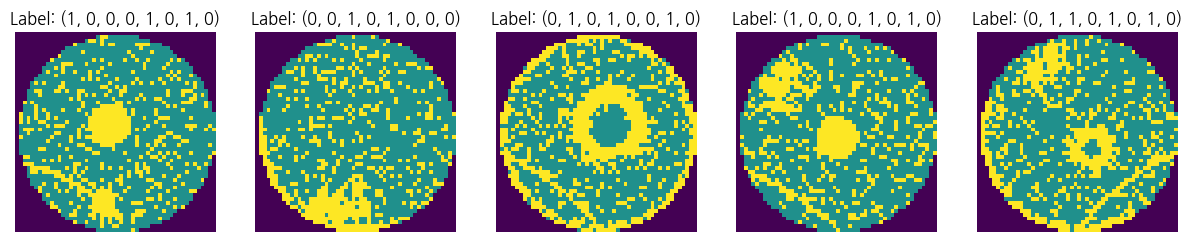

In [ ]:
# 샘플 이미지 출력 함수
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()

# 샘플 이미지 출력
plot_sample_images(images, labels_as_tuples)

In [ ]:

import numpy as np
from collections import Counter

# 파일 경로
data_path = '/content/drive/MyDrive/반도체 캐글_mix/single_normal_label_data.npz'

# 데이터 로드
with np.load(data_path) as data:
    labels = data['labels']
    images = data['images']

# 라벨을 튜플로 변환 (라벨이 다차원 배열인 경우)
labels_as_tuples = [tuple(label) for label in labels]

# 라벨별 빈도수 계산
label_counts = Counter(labels_as_tuples)

# 라벨과 각각의 빈도수 출력
for label, count in label_counts.items():
    print(f"Label {label}: {count}개")

# 총 데이터 수 출력
print(f"총 데이터 수: {len(labels)}개")


Label (1, 0, 0, 0, 0, 0, 0, 0): 1000개
Label (0, 1, 0, 0, 0, 0, 0, 0): 1000개
Label (0, 0, 1, 0, 0, 0, 0, 0): 1000개
Label (0, 0, 0, 1, 0, 0, 0, 0): 1000개
Label (0, 0, 0, 0, 1, 0, 0, 0): 1000개
Label (0, 0, 0, 0, 0, 0, 0, 1): 1000개
Label (0, 0, 0, 0, 0, 0, 0, 0): 1000개
Label (0, 0, 0, 0, 0, 1, 0, 0): 1000개
Label (0, 0, 0, 0, 0, 0, 1, 0): 1000개
총 데이터 수: 9000개


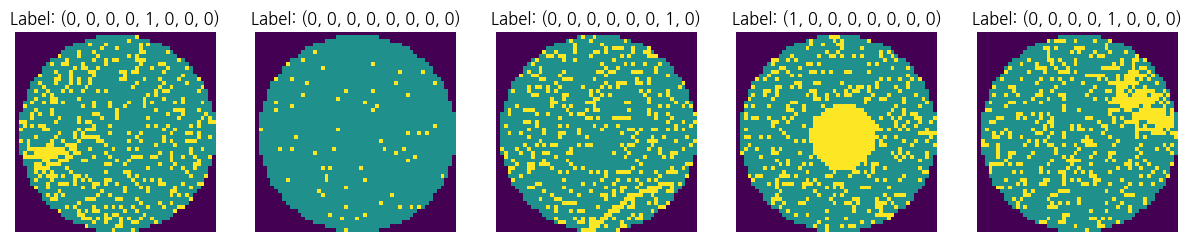

In [ ]:
# 샘플 이미지 출력 함수
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()

# 샘플 이미지 출력
plot_sample_images(images, labels_as_tuples)

# 체킹

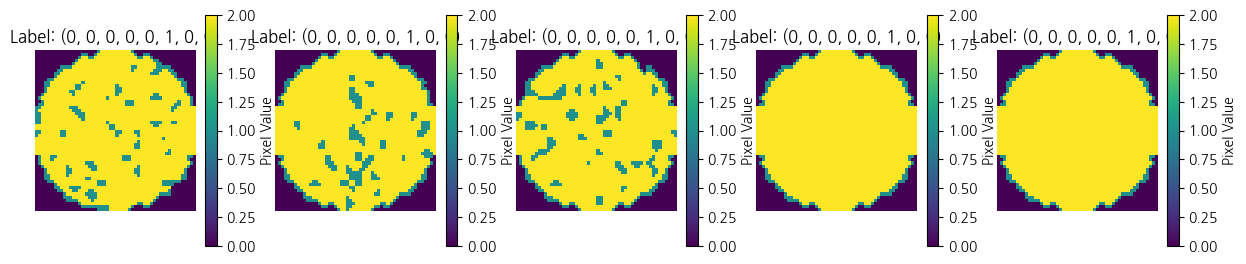

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 파일 경로
data_path = '/content/drive/MyDrive/반도체 캐글_mix/single_normal_label_data.npz'

# 데이터 로드
with np.load(data_path) as data:
    labels = data['labels']
    images = data['images']

# 라벨을 튜플로 변환 (라벨이 다차원 배열인 경우)
labels_as_tuples = [tuple(label) for label in labels]

# 특정 라벨을 가진 이미지를 찾기
target_label = (0, 0, 0, 0, 0, 1, 0, 0)
target_indices = [i for i, label in enumerate(labels_as_tuples) if label == target_label]

# 특정 라벨을 가진 이미지 출력 함수
def plot_target_label_images(images, labels, indices, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices[:num_samples]):
        plt.subplot(1, num_samples, i + 1)
        img = images[idx]
        plt.imshow(img)
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
        plt.colorbar(label='Pixel Value')  # Add colorbar for pixel values
    plt.show()

# 특정 라벨을 가진 이미지 출력
if target_indices:
    plot_target_label_images(images, labels_as_tuples, target_indices)
else:
    print(f"Label {target_label}을(를) 가진 이미지가 없습니다.")


# 다른 자료들

Selected image label: [1 0 0 0 0 0 0 0]


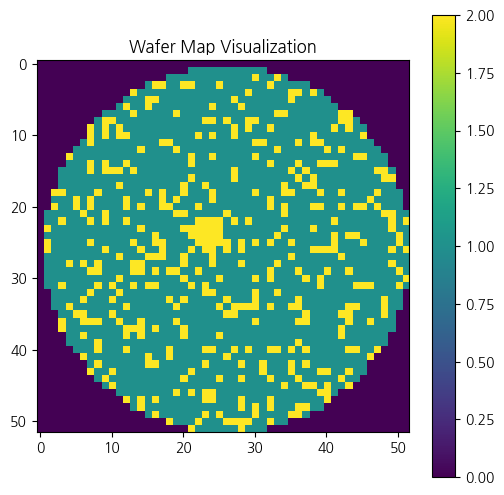

Value counts:
Value 0: 643 counts
Value 1: 1647 counts
Value 2: 414 counts

Density (%):
Value 0: 23.78%
Value 1: 60.91%
Value 2: 15.31%


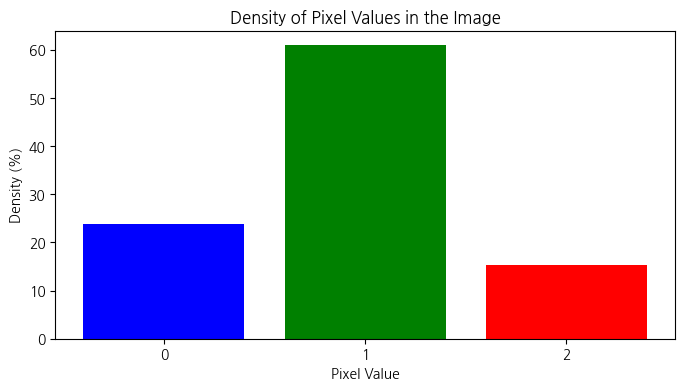

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# 특정 이미지 선택
image_index = 12109  # 이 값은 필요에 따라 변경 가능
selected_image = images[image_index]

# 해당 이미지의 레이블 출력
selected_label = labels[image_index]
print("Selected image label:", selected_label)

# 이미지 시각화
plt.figure(figsize=(6, 6))
plt.imshow(selected_image, cmap='viridis')
plt.colorbar()
plt.title("Wafer Map Visualization")
plt.show()

# 0, 1, 2 값의 개수 계산
values, counts = np.unique(selected_image, return_counts=True)
density = counts / selected_image.size * 100  # 밀도를 퍼센트로 계산

# 결과 출력
print("Value counts:")
for value, count in zip(values, counts):
    print(f"Value {value}: {count} counts")

print("\nDensity (%):")
for value, dens in zip(values, density):
    print(f"Value {value}: {dens:.2f}%")

# 밀도를 그래픽으로 표현
plt.figure(figsize=(8, 4))
plt.bar(values, density, color=['blue', 'green', 'red'])
plt.xlabel('Pixel Value')
plt.ylabel('Density (%)')
plt.title('Density of Pixel Values in the Image')
plt.xticks(values)
plt.show()


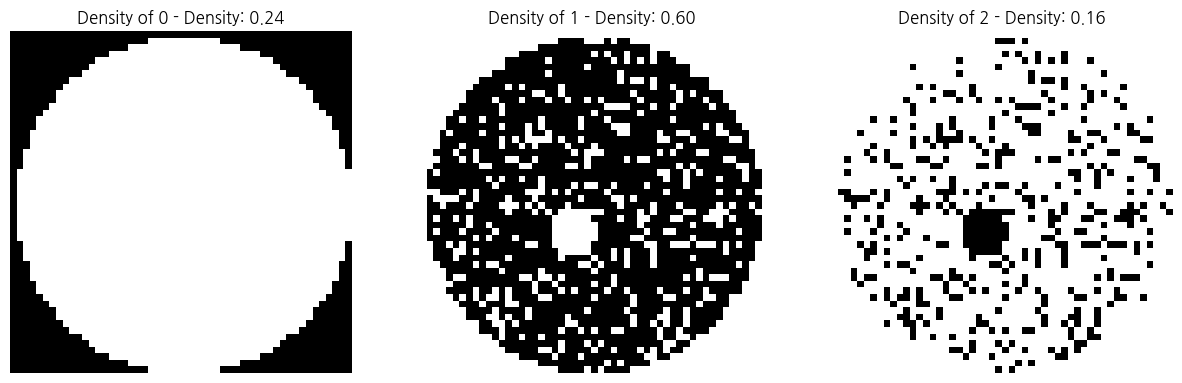

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 특정 이미지 선택
image_index = 12000  # 이 값은 필요에 따라 변경 가능
selected_image = images[image_index]

# 값 0, 1, 2의 밀도 맵 생성 및 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
values = [0, 1, 2]
titles = ['Density of 0', 'Density of 1', 'Density of 2']

for i, value in enumerate(values):
    # 특정 값에 대한 마스크 생성
    mask = selected_image == value
    # 밀도 계산 (마스크의 True 개수를 총 픽셀 수로 나눔)
    density = np.sum(mask) / mask.size
    # 밀도 맵 시각화
    ax = axes[i]
    ax.imshow(mask, cmap='Greys', interpolation='nearest')
    ax.set_title(f'{titles[i]} - Density: {density:.2f}')
    ax.axis('off')

plt.show()


픽셀 0: 보라색, 픽셀 1: 초록색, 픽셀 2: 노란색 ----------> 2가 error

# 픽셀 2만 검은색으로 나머지는 하얀색으로 변환 후 drive에 저장, 크기는 52*52

In [ ]:
# 패턴 이름과 레이블 매핑
pattern_names = {
    (0, 0, 0, 0, 0, 0, 0, 0): "Normal",
    (0, 0, 0, 0, 0, 0, 0, 1): "Near_Full",
    (0, 0, 0, 0, 0, 0, 1, 0): "Scratch",
    (0, 0, 0, 0, 0, 1, 0, 0): "Random",
    (0, 0, 0, 0, 1, 0, 0, 0): "Loc",
    (0, 0, 0, 0, 1, 0, 1, 0): "Loc+Scratch",
    (0, 0, 0, 1, 0, 0, 0, 0): "Edge_Ring",
    (0, 0, 0, 1, 0, 0, 1, 0): "Edge_Ring+Scratch",
    (0, 0, 0, 1, 1, 0, 0, 0): "Edge_Ring+Loc",
    (0, 0, 0, 1, 1, 0, 1, 0): "Edge_Ring+Loc+Scratch",
    (0, 0, 1, 0, 0, 0, 0, 0): "Edge_Loc",
    (0, 0, 1, 0, 0, 0, 1, 0): "Edge_Loc+Scratch",
    (0, 0, 1, 0, 1, 0, 0, 0): "Edge_Loc+Loc",
    (0, 0, 1, 0, 1, 0, 1, 0): "Edge_Loc+Loc+Scratch",
    (0, 1, 0, 0, 0, 0, 0, 0): "Donut",
    (0, 1, 0, 0, 0, 0, 1, 0): "Donut+Scratch",
    (0, 1, 0, 0, 1, 0, 0, 0): "Donut+Loc",
    (0, 1, 0, 0, 1, 0, 1, 0): "Donut+Loc+Scratch",
    (0, 1, 0, 1, 0, 0, 0, 0): "Donut+Edge_Ring",
    (0, 1, 0, 1, 0, 0, 1, 0): "Donut+Edge_Ring+Scratch",
    (0, 1, 0, 1, 1, 0, 0, 0): "Donut+Edge_Ring+Loc",
    (0, 1, 0, 1, 1, 0, 1, 0): "Donut+Edge_Ring+Loc+Scratch",
    (0, 1, 1, 0, 0, 0, 0, 0): "Donut+Edge_Loc",
    (0, 1, 1, 0, 0, 0, 1, 0): "Donut+Edge_Loc+Scratch",
    (0, 1, 1, 0, 1, 0, 0, 0): "Donut+Edge_Loc+Loc",
    (0, 1, 1, 0, 1, 0, 1, 0): "Donut+Edge_Loc+Loc+Scratch",
    (1, 0, 0, 0, 0, 0, 0, 0): "Center",
    (1, 0, 0, 0, 0, 0, 1, 0): "Center+Scratch",
    (1, 0, 0, 0, 1, 0, 0, 0): "Center+Loc",
    (1, 0, 0, 0, 1, 0, 1, 0): "Center+Loc+Scratch",
    (1, 0, 0, 1, 0, 0, 0, 0): "Center+Edge_Ring",
    (1, 0, 0, 1, 0, 0, 1, 0): "Center+Edge_Ring+Scratch",
    (1, 0, 0, 1, 1, 0, 0, 0): "Center+Edge_Ring+Loc",
    (1, 0, 0, 1, 1, 0, 1, 0): "Center+Edge_Ring+Loc+Scratch",
    (1, 0, 1, 0, 0, 0, 0, 0): "Center+Edge_Loc",
    (1, 0, 1, 0, 0, 0, 1, 0): "Center+Edge_Loc+Scratch",
    (1, 0, 1, 0, 1, 0, 0, 0): "Center+Edge_Loc+Loc",
    (1, 0, 1, 0, 1, 0, 1, 0): "Center+Edge_Loc+Loc+Scratch"
}



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os





# 이미지 저장 경로 설정
save_dir = '/content/drive/MyDrive/반도체 캐글_mix/데이터'

# 이미지 처리 및 저장
for idx, (image, label) in enumerate(zip(images, labels)):
    # 레이블을 튜플로 변환
    label_tuple = tuple(label)
    # 레이블에 해당하는 패턴 이름 찾기
    pattern_name = pattern_names.get(label_tuple, "Unknown")

    # 서브폴더 경로 생성
    sub_folder_path = os.path.join(save_dir, pattern_name)
    os.makedirs(sub_folder_path, exist_ok=True)  # 폴더가 없다면 생성

    # 이미지 처리: 2는 검은색, 0과 1은 하얀색
    processed_image = np.where(image == 2, 0, 1)

    # 이미지 저장 경로
    image_path = os.path.join(sub_folder_path, f'image_{idx}.png')

    # 이미지 저장
    plt.imsave(image_path, processed_image, cmap='gray')

print("모든 이미지 처리 및 저장 완료")


모든 이미지 처리 및 저장 완료


In [ ]:
import numpy as np

# 이미지 처리 함수
def process_images(images):
    processed_images = np.where(images == 2, 0, 1)
    return processed_images

# 이미지 처리
processed_images = process_images(images)

# 데이터 저장 경로 설정
save_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터_processed.npz'

# 데이터 저장
np.savez_compressed(save_path, processed_images=processed_images, labels=labels)

print("이미지 처리 및 저장 완료")


이미지 처리 및 저장 완료


이미지 저장코드

In [ ]:
import os

# 이미지가 있는 폴더 경로
parent_folder_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터'

# 각 폴더의 이미지 수를 세는 함수
def count_images_in_folders(parent_folder_path):
    folders_images_count = {}
    for folder_name in os.listdir(parent_folder_path):
        folder_path = os.path.join(parent_folder_path, folder_name)
        if os.path.isdir(folder_path):
            images_count = sum([len(files) for _, _, files in os.walk(folder_path)])
            folders_images_count[folder_name] = images_count
    return folders_images_count

# 각 폴더의 이미지 수 계산
folders_images_count = count_images_in_folders(parent_folder_path)

# 결과 출력
for folder_name, image_count in folders_images_count.items():
    print(f"폴더 '{folder_name}': {image_count}개의 이미지")


폴더 'Normal': 1000개의 이미지
폴더 'Center+Edge_Loc+Scratch': 2000개의 이미지
폴더 'Center+Edge_Loc': 1000개의 이미지
폴더 'Center+Edge_Ring+Scratch': 1000개의 이미지
폴더 'Center+Edge_Ring': 1000개의 이미지
폴더 'Center+Edge_Loc+Loc+Scratch': 1000개의 이미지
폴더 'Center+Edge_Loc+Loc': 1000개의 이미지
폴더 'Center+Edge_Ring+Loc+Scratch': 1000개의 이미지
폴더 'Center+Edge_Ring+Loc': 1000개의 이미지
폴더 'Center+Loc+Scratch': 1000개의 이미지
폴더 'Center+Loc': 1000개의 이미지
폴더 'Center+Scratch': 1000개의 이미지
폴더 'Center': 1000개의 이미지
폴더 'Donut+Edge_Loc+Scratch': 1000개의 이미지
폴더 'Donut+Edge_Loc': 1000개의 이미지
폴더 'Donut+Edge_Ring+Scratch': 1000개의 이미지
폴더 'Donut+Edge_Ring': 1000개의 이미지
폴더 'Donut+Edge_Loc+Loc+Scratch': 1000개의 이미지
폴더 'Donut+Edge_Loc+Loc': 1000개의 이미지
폴더 'Donut+Edge_Ring+Loc+Scratch': 1000개의 이미지
폴더 'Donut+Edge_Ring+Loc': 1000개의 이미지
폴더 'Donut+Loc+Scratch': 1000개의 이미지
폴더 'Donut+Loc': 1000개의 이미지
폴더 'Donut+Scratch': 1000개의 이미지
폴더 'Donut': 1000개의 이미지
폴더 'Edge_Loc': 1000개의 이미지
폴더 'Edge_Ring': 1000개의 이미지
폴더 'Edge_Loc+Loc+Scratch': 1000개의 이미지
폴더 'Edge_Loc+Loc': 1000개의

In [ ]:
import os

# 이미지 폴더 경로
folder_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터'

# 이미지 파일 수를 세는 함수
def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg'):
                total_images += 1
    return total_images

# 이미지 파일 수 계산
num_images = count_images(folder_path)
print(f"폴더 및 하위 폴더 내 이미지 수: {num_images}개")


폴더 및 하위 폴더 내 이미지 수: 38015개


In [ ]:
import os

# 이미지 폴더 경로
folder_path = '/content/drive/MyDrive'

# 이미지 파일 수 세기
num_images = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"폴더 내 이미지 수: {num_images}개")


폴더 내 이미지 수: 29755개
